# 使用网格LSTM的中文命名实体识别
张悦 和杨洁
 
新加坡科技与设计大学

# 摘要
我们研究了一个用于中文NER的网格结构LSTM模型，该模型编码一系列输入字符以及与词典匹配的所有潜在单词。与基于字符的方法相比，我们的模型明确地利用了单词和单词序列信息。与基于字的方法相比，网格LSTM不会受到分段错误的影响。门控循环单元允许我们的模型从句子中选择最相关的字符和单词以获得更好的NER结果。各种数据集上的实验表明，网格LSTM优于基于词的LSTM和基于字符的LSTM基线，从而获得最佳结果。

# 1介绍
作为信息提取的基本任务，命名实体识别（NER）近年来受到的关注不断增加。该任务传统上用来解决为序列标记问题，其中实体边界和类别标签是联合预测的。通过使用LSTM-CRF模型，已经实现了目前英语NER的最新技术水平。信息在融入单词表示。

汉语NER与分词有关。特别是，命名实体边界也是字边界。一种直观的方式形成中文NER是首先执行单词分段，在应用单词序列标签之前。分段NER管道，然而，可能会遇到错误的潜在问题因为NEs是OOV的重要来源在分段中，以及错误分段的实体边界导致NER错误。这个问题自从交叉以来，在开放域中可能是严重的域名分词仍然是一个未解决的问题。已经表明，汉语NER，基于字符的方法优于基于单词的方法。
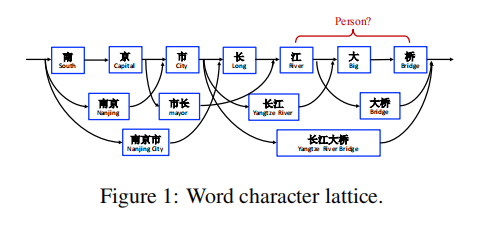
图1 词的字符网格

基于字符的NER的一个缺点，然而，是明确的单词和单词序列形成没有得到充分利用，这可能是有用的。为了解决这个问题，我们进来了将潜在的单词信息整合到角色中基于LSTM-CRF，通过使用网格结构LSTM表示来自句子的词典单词。如图1所示，我们构造了一个单词字符网格通过匹配一个句子与一个大的自动获得的词典。结果，“长江大桥（长江大桥）”，“长江（长江）”和“大桥（桥）”等词序可用于消除潜力在上下文中的相关命名实体，例如人名“江大桥（Daqiao Jiang）''。

由于有一个指数的单词网格中的字符路径，我们利用格子LSTM结构自动控制从句子开头到结尾的形成流程。如图2所示，门控单元用于动态路由信息每个角色的不同路径。通过训练NER数据，网格LSTM可以学习从上下文中自动找到更有用的单词以进行更好的NER表现。比较基于字符和基于词的NER方法，我们的模型具有利用显式单词的优势字符序列标记的没有分割错误。

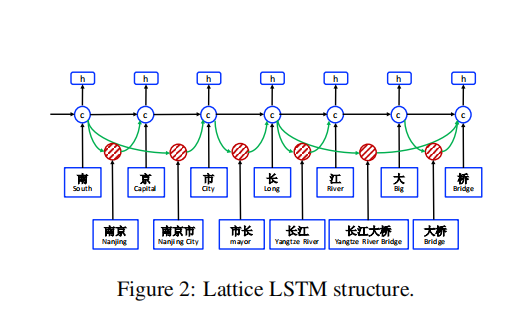

结果表明我们的模型显着使用LSTM-CRF执行字符序列标记模型和单词序列标记模型，在不同域的各种中文NER数据集上提供最佳结果。我们的代码和数据发布在https://github.com/jiesutd/LatticeLSTM。

# 2相关工作
我们的工作符合我们现有的方法神经网络用于NER。尝试使用单向LSTM解决问题，这是第一个神经网络的NER模型。使用CNN-CRF结构，获得最佳统计模型的竞争结果。使用字符CNN来增强CNN-CRF模型。最近的工作利用了LSTM-CRF架构。（2015）使用手工拼写功能;使用字符CNN代表拼写特征。使用字符LSTM代替。我们基于单词的基线系统采用与此工作类似的结构。

字符序列标签一直是优势方法对于汉语NER。有比较统计的明确讨论基于统计词和基于字符的任务方法，表明后者在经验上是一个更好的选择。我们发现，通过适当的表示设置，相同的结论适用于神经网络NER。另一方面，与单词LSTM和字符LSTM相比，网格LSTM是更好的选择。

如何更好地利用中文NER的单词信息已经得到了继续研究关注，其中分割信息已被用作NER的软特征，联合分割和NER已经使用双重分解进行了研究，多任务学习。我们的工作是一致的，专注于神经表征学习。虽然上述方法可能受到分段训练数据和分段错误的影响，但我们的方法不需要分词器。该模型是慷慨的比通过不考虑多任务设置更简单。

NER利用了外部信息来源。特别地，词典特征已被广泛使用。使用词级语言建模目标来增强NER训练，对大型原始文本执行多任务学习。预先训练一个字符语言模型来增强单词表示。通过多任务学习利用跨域和跨语言知识。我们通过在大型自动分段文本上预训练单词嵌入词典来利用外部数据语言建模等监督技术是正交的，也可以用于我们的网格LSTM模型。

网格结构的RNN可以被视为RNN树状结构神经延伸，的直接扩展到DAGs。它们已被用于模拟运动动力学，依赖性话语DAG，以及语音标记化格和NMT编码器的多粒度分割输出。与现有工作相比，我们的网格LSTM在动机和结构上都有所不同。例如，被设计用于以字符为中心的网格-LSTM-CRF序列标记，它具有循环单元但不包含用于单词的隐藏向量。据我们所知，我们是第一个为混合字符和词典单词设计新的网格LSTM表示法，并且第一个使用单词字符网格表示无分词的中文NER。

# 3模型
我们遵循最佳英语NER模型，使用LSTM-CRF作为主要网络结构。形式上，将输入句子表示为s = c1，C2，...，cm，其中Cj表示第j个字符。s可以进一步被视为单词序列s = W1，W2，...，wn，其中Wi表示句子中的第i个单词，使用中文分段器获得。我们使用t(i,k）来表示索引j,第k个字符在句子的第i个单词。拿图1为例。如果分割是“南京市长江大桥”，索引是1，那么t（2,1）= 4（长）和t（1,3）= 3（市）。我们使用BIOES标记方案这两个基于词和基于字符的NER标记。

个人理解：t(i,k) = j：整体表示字符位置。i表示第i个词。k表示第i个词中的第k个字。j表示第i个词中的第k个字在句子中的第j个字符。

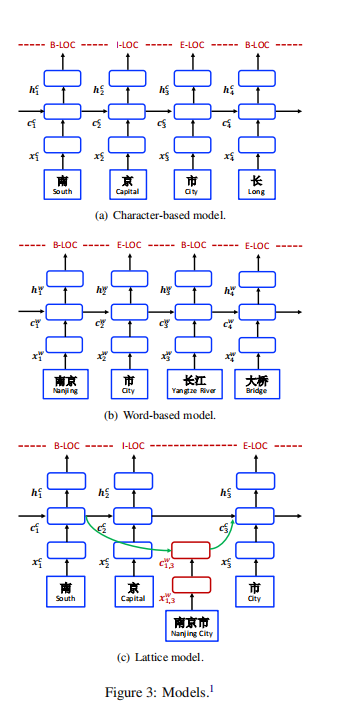

## 3.1基于字符的模型
基于字符的模型如图3（a）所示。它使用LSTM-CRF模型字符序列C1，C2，...，Cm。使用表示每个字符Cj被表示用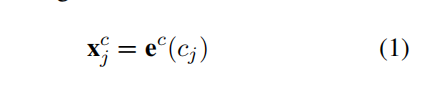

ec 表示字符嵌入查找表。

一个双向LSTM（在结构上相同）从左到右和从右到左的方向，表示两组不同的参数。每个角色的隐藏矢量表示是：
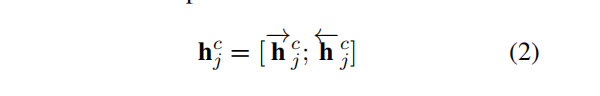

一个标准的CRF模型用于h1c,h2c,...,hmc;用于序列标记。

* Char + bichar。

字符双字母已被证明可用于在分词中表示字符。我们通过将bigram嵌入与字符嵌入连接起来，用bigram信息扩充基于字符的模型：
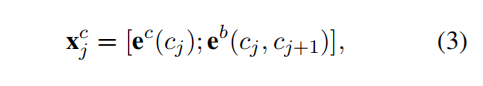

其中eb 表示字符二元组查找表。

* Char + softword。
已经表明，使用分段作为基于字符的NER模型的软特征可以提高性能。
我们用分段的字符表示通过连接分段标签嵌入到字符嵌入中：
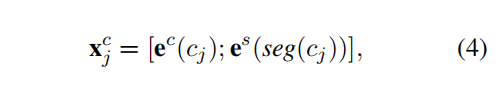
其中es 代表分割标签嵌入查找表，seg（cj）表示分段字段分割器给出的字符Cj上的标签。我们使用BMES方案代表

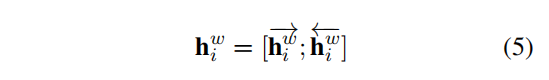
与基于字符的情况类似，标准CRF模型用于h1w，h2w，...，hmw,用于序列标记。

## 3.2基于词的模型
基于单词的模型如图3（b）所示。它采用嵌入ew(wi)这个词来表示每个字Wi：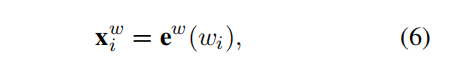

其中ew 表示字嵌入表。双向LSTM用于获得左右序列隐藏状态的行为，应分别为词Wi，W2，...，wn。最后，对于每个单词被连接为其表示：

* 集成字符表示

字符CNN和LSTM都用于表示单词中的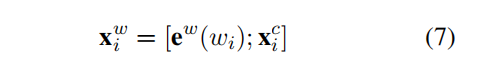字符序列。我们对中国的NER进行了实验。字符表示用wi做为xic,一个新的词表示被链接ew(wi)和xic:|


##  3.3网格模型
网格模型的整体结构如图2所示，可以看作是基于字符模型的扩展，集成了基于词的单元和附加的控制信息流的门。

如图3(c)所示，模型的输入为字符序列Ci, C2，…，Cm以及匹配词典 D。单词的所有字符子序列)。As Section 2 中 显示 , 我们使用自动分段大原始文本 buinding ID. Using u)ge 表示 这样 的 子 序列 开头 字符 索引 b 和 结尾 character 指数 e,  Figure 1 中的 部分 是 “南京 (Nanjing)” 和 wd7,8 is “大桥 (Bridge)”. 

参考：https://www.cnblogs.com/bep-feijin/p/9650856.html

https://www.cnblogs.com/AngelaSunny/p/9771588.html